In [80]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [82]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5120,spam,PRIVATE! Your 2003 Account Statement for 078,NaN,NaN,NaN
1060,ham,I'm working technical support :)voice process....,NaN,NaN,NaN
4445,ham,Merry christmas to u too annie!,NaN,NaN,NaN
5186,ham,I uploaded mine to Facebook,NaN,NaN,NaN
3173,ham,It vl bcum more difficult..,NaN,NaN,NaN


In [83]:
# drop last 3 cols
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [87]:
data.sample(5)

,v1,v2
4296,spam,thesmszone.com lets you send free anonymous an...
4541,spam,FreeMsg Hi baby wow just got a new cam moby. W...
5460,spam,December only! Had your mobile 11mths+? You ar...
4631,ham,"I'm in a meeting, call me later at"
5352,ham,Good morning princess! Have a great day!


In [88]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [89]:
data['v1'] = encoder.fit_transform(data['v1'])

In [90]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
 # renaming the cols
data.rename(columns={'v1': 'spam','v2': 'text'},inplace=True)
data.sample(5)

,spam,text
2689,0,"Ya ok, vikky vl c witin &lt;#&gt; mins and il..."
4992,0,\HEY KATE
4999,0,Well its not like you actually called someone ...
3814,0,"Not yet chikku..k, then wat abt tht guy did he..."
2023,0,Is there any movie theatre i can go to and wat...


In [92]:
data.shape

(5572, 2)

In [152]:
data['text'][5120]

'PRIVATE! Your 2003 Account Statement for 078'

In [94]:
data['spam'].value_counts()

0    4825
1     747
Name: spam, dtype: int64

In [95]:
import seaborn as sns

<AxesSubplot: ylabel='count'>

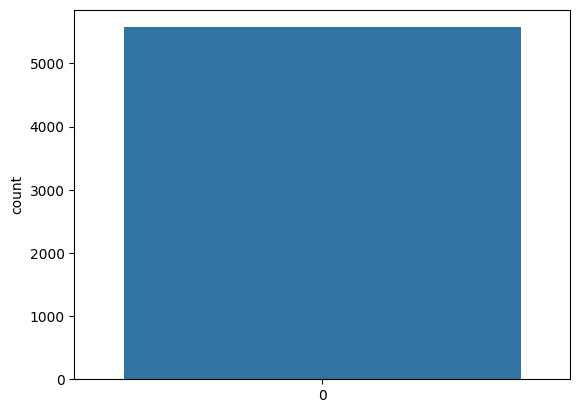

In [97]:
sns.countplot(data['spam'])
# plt.figure(figsize=(5,3))
# sns.histplot(data[data['spam'] == 0])
# sns.histplot(data[data['spam'] == 1],color='red')

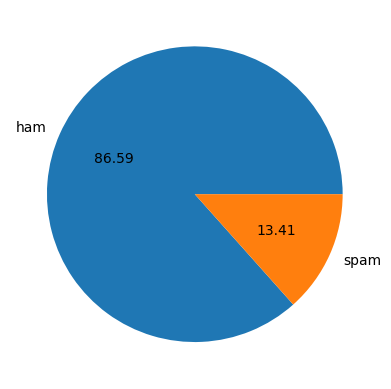

In [98]:
import matplotlib.pyplot as plt
plt.pie(data['spam'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [99]:
data.duplicated().sum()

403

In [100]:
data.drop_duplicates(inplace=True)

In [101]:
data.duplicated().sum()

0

In [102]:
data.isnull().sum()

spam    0
text    0
dtype: int64

In [103]:
data.shape

(5169, 2)

<AxesSubplot: ylabel='count'>

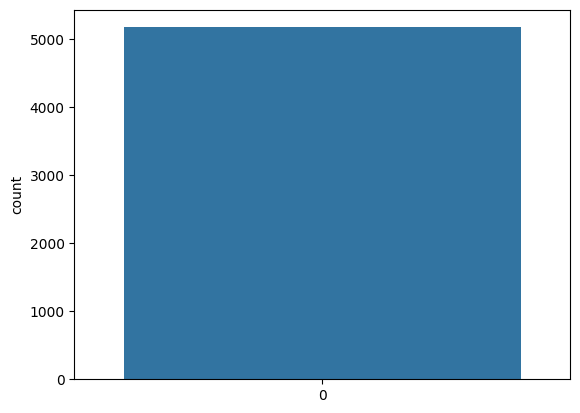

In [105]:
sns.countplot(data['spam'])

In [106]:
data['spam'].value_counts()

0    4516
1     653
Name: spam, dtype: int64

## Separate in X and Y

In [107]:
X = data['text'].values
y = data['spam'].values

In [108]:
y

array([0, 0, 1, ..., 0, 0, 0])

## Train - Test split

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [110]:
X_train.shape

(4135,)

In [111]:
X_test.shape

(1034,)

In [112]:
y_train.shape

(4135,)

In [113]:
y_test.shape

(1034,)

## Preprocessing

In [114]:
from sklearn.feature_extraction.text import CountVectorizer

In [115]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [116]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [117]:
len(x_train.toarray())

4135

In [118]:
len(x_train.toarray()[0])

7594

## Training by ML Algorithm

In [119]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [120]:
nb.fit(x_train, y_train)

MultinomialNB()

In [121]:
x_test = cv.transform(X_test)

In [122]:
len(x_test.toarray())

1034

In [123]:
len(x_test.toarray()[0])

7594

In [124]:
y_pred = nb.predict(x_test)

In [125]:
from sklearn.metrics import accuracy_score

In [128]:
print("Testing Accuracy:")
accuracy_score(y_pred, y_test)

Testing Accuracy:


0.9816247582205029

In [129]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.9929866989117292

## Lets test using some emails

In [130]:
email = ['Hey, Jack whats up dude? Tomorrow please meet with me at my home.']

In [131]:
clean_email = cv.transform(email)

In [132]:
len(clean_email.toarray()[0])

7594

In [133]:
check = nb.predict(clean_email)[0]

In [134]:
check

0

## Evaluation Function

In [154]:
email = ['PRIVATE! Your 2003 Account Statement for 078']

clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Spam Email!
